Written By: Hafiz Waleed Ahmad\
Email: waleedrajpoot5657@gmail.com\
Title: Feature Scaling and Normalization

# 1. Standard Scaling:
 
`Standard scaler` is a method for scaling the data such that the distribution of the data is centred around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is very common method of scaling data, and is used in many machine learning algos.

The Formula is as follow:

Z = (X - μ) / σ


In [7]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler


In [8]:
# make an example dataset
df = {
    'age': [25, 30, 35, 40, 45],
    'height': [165, 170, 175, 180, 185],
    'weight': [55, 60, 65, 70, 75]
}

# convert this data into pandas dataframe
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [6]:
# import the scaler
scaler = StandardScaler()

# fit the scaler on data
scaled_df = scaler.fit_transform(df)
scaled_df

# convert the scaled data into pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# ***Min Max Scaler***

In [9]:
# import the scaler
scaler = MinMaxScaler()

# fit the scaler on data
scaled_df = scaler.fit_transform(df)
scaled_df

# convert the scaled data into pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# ***Max Absolute Scaler***

In [10]:
# import the scaler
scaler = MaxAbsScaler()

# fit the scaler on data
scaled_df = scaler.fit_transform(df)
scaled_df

# convert the scaled data into pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# ***Robust Scaler***

In [11]:
from sklearn.preprocessing import RobustScaler

# import the scaler
scaler = RobustScaler()

# fit the scaler on data
scaled_df = scaler.fit_transform(df)
scaled_df

# convert the scaled data into pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


----
# ***Transformation***

In [12]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# generate non-normal data from exponential distribution
np.random.seed(0)
df = np.random.exponential( size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

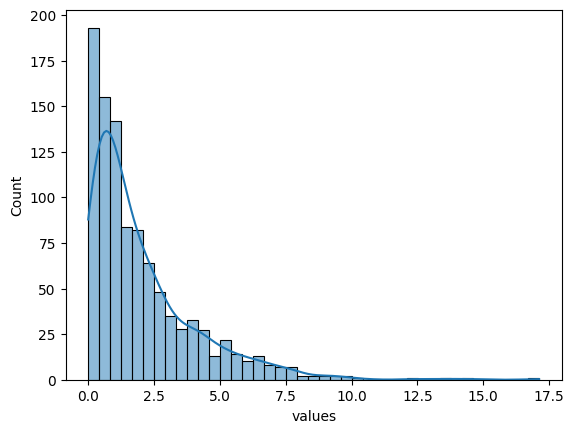

In [15]:
sns.histplot(df['values'], kde=True)

In [22]:
# import power transformer
from sklearn.preprocessing import PowerTransformer
# import Quantile Transformer
from sklearn.preprocessing import QuantileTransformer

# to use box-cox transformation
pt_box_cox = PowerTransformer(method='box-cox', standardize=True)

# to use yeo-johnson transformation
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')

# to use quantile transformation
qt = QuantileTransformer(output_distribution='normal')

#box-cox k lia data passitive hona lazmi h
# add box-cox transformed data to dataframe
df['box_cox'] = pt_box_cox.fit_transform(df[['values']])

# add yeo-johnson transformed data to dataframe
df['yeo_johnson'] = pt_yeo_johnson.fit_transform(df[['values']])

# add quantile transformed data to dataframe
df['quantile'] = qt.fit_transform(df[['values']])



In [23]:
df.head()

,values,box_cox,yeo_johnson,quantile
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930


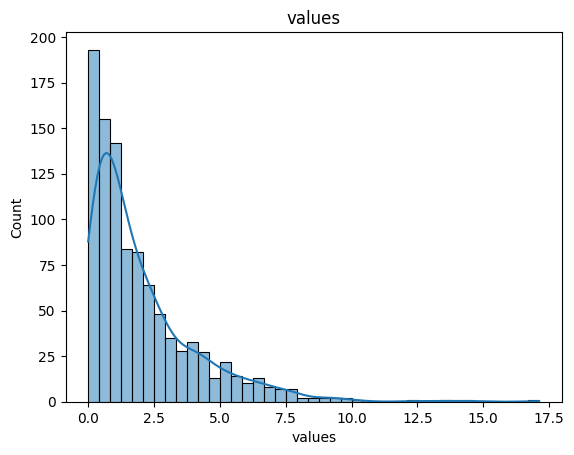

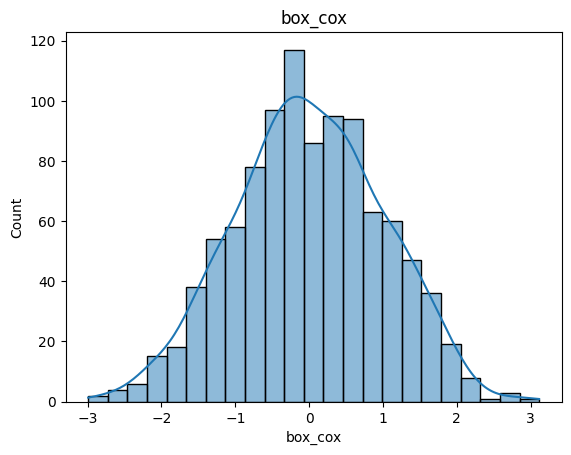

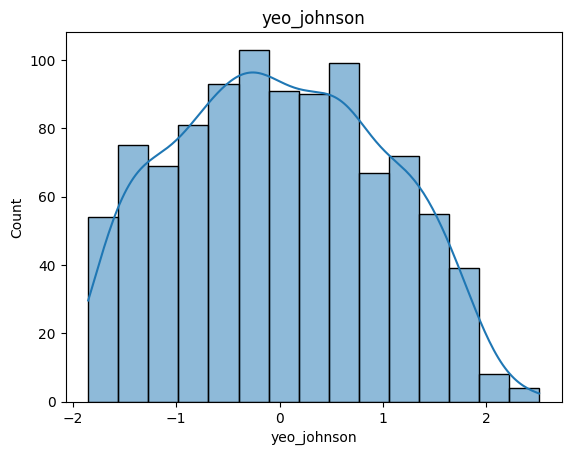

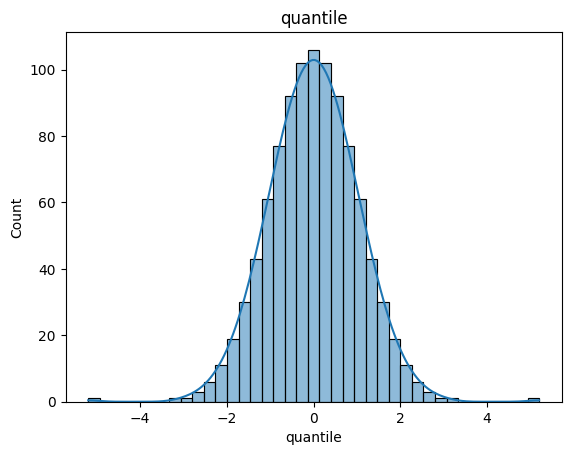

In [24]:
# create histogram for all columns using sns.hist and kde=True use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

---
# Normalization

# L2 Normalization:
 Rescale the each row to have unit norm. This type of normalization is often used when dealing with textual data. The L2 norm is calculated as the square root of sum of the squared vector values. 

In [1]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization.
Rescale the each row but with a different approch, ensuring the sum of the absolute values is 1 in each row. The L1 norm is calculated as the square root of the sum of the absolute vector values. 

In [2]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


---
# Log Transformation

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

# example dataset with skewed data
df = {'values': [1, 5, 10, 20, 30, 50, 100, 200, 500, 1000, 2000, 5000,  10000, 100000, 1000000, 10000000]}
df = pd.DataFrame(df)
df.head()

,values
0,1
1,5
2,10
3,20
4,30


In [10]:
# log transformation
df['log_values'] = np.log(df['values'])
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,30,3.401197
5,50,3.912023
6,100,4.605170
7,200,5.298317
8,500,6.214608
9,1000,6.907755


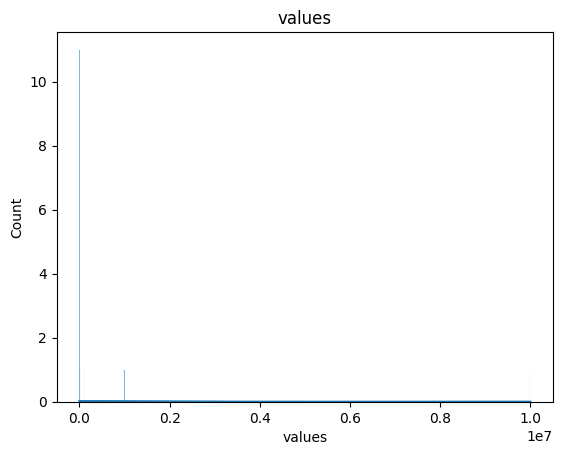

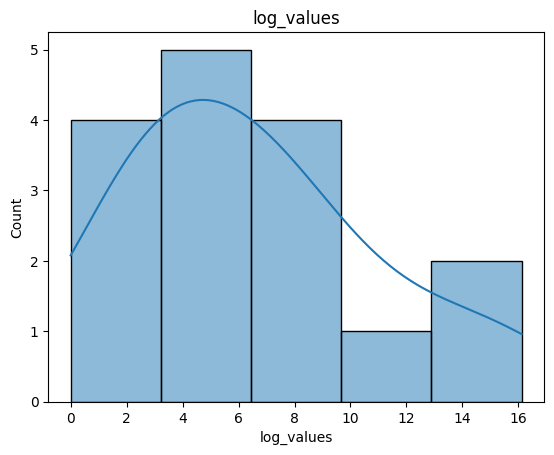

In [12]:
import matplotlib.pyplot as plt
# make histplot to see the distribution
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

---